In [89]:
import pandas as pd
def read_datasets(fname):
    data = pd.read_csv(fname,index_col = 0)
    data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
    data['Sex'] = (data['Sex'] == 'male').astype('int')
    labels = data['Embarked'].unique().tolist()
    data['Embarked'] = data['Embarked'].apply(lambda n:labels.index(n))
    print ('a')
    data = data.fillna(value = 0)
    return data
train_data = read_datasets('datasets/titanic/train.csv')
train_data.head()
train_data.shape


a


(891, 8)

In [90]:
from sklearn.model_selection import train_test_split
y = train_data['Survived'].values
X = train_data.drop(['Survived'],axis=1).values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2)
print (X_train.shape,X_test.shape)

(712, 7) (179, 7)


In [91]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train,y_train)
train_score = clf.score(X_train,y_train)
test_score = clf.score(X_test,y_test)
print ('train score:{0};test score:{1}'.format(train_score,test_score))
#训练结果明显高于cross validation的结果 出现了过拟合，接下来优化模型


train score:0.9367977528089888;test score:0.776536312849162


In [92]:
import numpy as np 
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    return (train_score,test_score)

depths = range(2,15)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_depth = depths[best_score_index]
best_depth,best_score

(3, 0.8044692737430168)

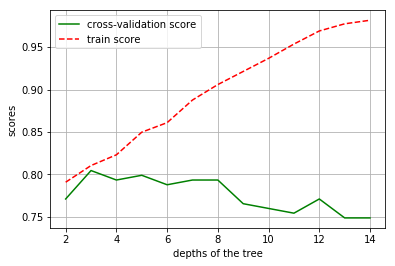

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.grid()
plt.xlabel('depths of the tree')
plt.ylabel('scores')
plt.plot(depths,cv_scores,'g-',label = 'cross-validation score')
plt.plot(depths,tr_scores,'r--',label = 'train score')
plt.legend()

In [94]:
import numpy as np
def cv_score1(val):
    clf = DecisionTreeClassifier(criterion= 'entropy',min_impurity_split=val)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    return (train_score,test_score)

values = np.linspace(0,0.5,50)
scores = [cv_score1(val) for val in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_value = values[best_score_index]
best_value,best_score

(0.4081632653061224, 0.82681564245810057)

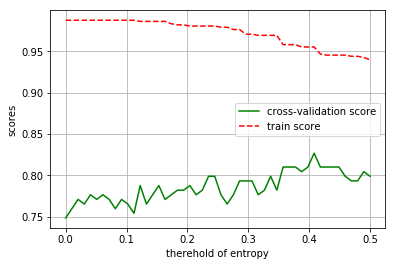

In [95]:
plt.figure()
plt.grid()
plt.xlabel('therehold of entropy')
plt.ylabel('scores')
plt.plot(values,cv_scores,'g-',label = 'cross-validation score')
plt.plot(values,tr_scores,'r--',label = 'train score')
plt.legend()

In [96]:
from sklearn.model_selection import GridSearchCV

thereholds = np.linspace(0,0.5,50)
param_grid = {'min_impurity_split':thereholds}
clf = GridSearchCV(DecisionTreeClassifier(),param_grid,cv = 5)
clf.fit(X,y)
print (clf.best_params_,clf.best_score_)

{'min_impurity_split': 0.22448979591836732} 0.821548821549


/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


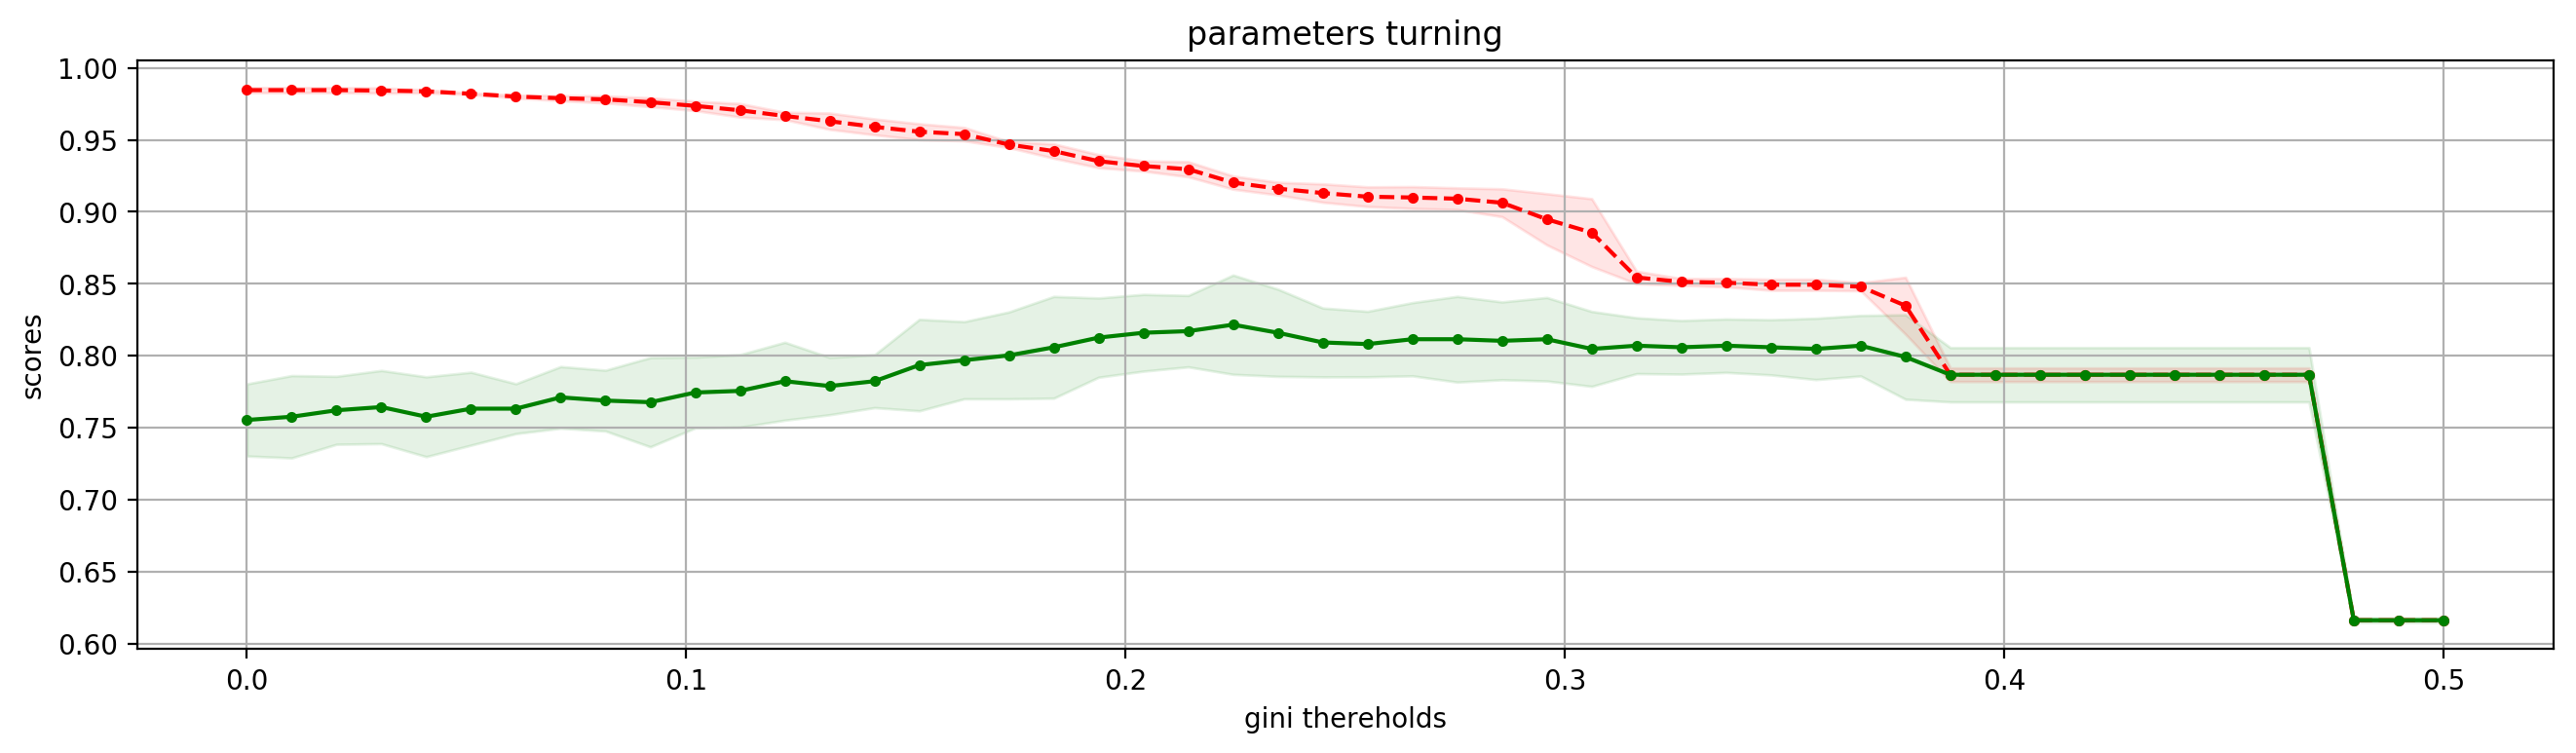

In [97]:
def plot_curve(train_sizes,cv_results,xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    
    plt.figure(figsize=(16,4),dpi = 200)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('scores')
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha = 0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'.--',color='r')
    plt.plot(train_sizes,test_scores_mean,'.-',color='g')
    plt.legend(loc = 'best')
plot_curve(thereholds,clf.cv_results_,xlabel='gini thereholds')

In [107]:
entropy_thresholds = np.linspace(0,1,50)
gini_thresholds = np.linspace(0,0.5,50)

param_grid = [{'criterion':['entropy'],
              'min_impurity_split':entropy_thresholds},
             {'criterion':['gini'],
             'min_impurity_split':gini_thresholds},
             {'max_depth':range(2,10)},
             {'min_samples_split':range(2,30,2)}]


clf = GridSearchCV(DecisionTreeClassifier(),param_grid,cv = 5)
clf.fit(X,y)
print(clf.best_params_,clf.best_score_)

{'criterion': 'entropy', 'min_impurity_split': 0.53061224489795911} 0.828282828283


In [118]:
from sklearn.ensemble import RandomForestClassifier
clf  = RandomForestClassifier(n_estimators = 100 , max_depth = 2,random_state = 0)
clf.fit(X,y)
print (clf.feature_importances_,clf.predict)

[ 0.19688135  0.51445694  0.01604256  0.04406829  0.04606532  0.14252266
  0.03996287] <bound method ForestClassifier.predict of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)>
